In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
uploaded = files.upload()

Saving a100_data10000.csv to a100_data10000.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['a100_data10000.csv']))

In [4]:
df

,C2,s,w11_max,w12_min,BandGap1
0,0.15,0.01,250.00,256.69,6.689500e+00
1,0.30,0.01,353.55,359.20,5.649800e+00
2,0.45,0.01,433.01,437.28,4.264400e+00
3,0.60,0.01,500.00,502.95,2.945800e+00
4,0.75,0.01,559.02,560.77,1.748300e+00
...,...,...,...,...,...
9995,14.40,1.00,645.50,645.50,4.090000e-12
9996,14.55,1.00,645.50,645.50,7.840000e-12
9997,14.70,1.00,645.50,645.50,2.270000e-13
9998,14.85,1.00,645.50,645.50,4.550000e-12


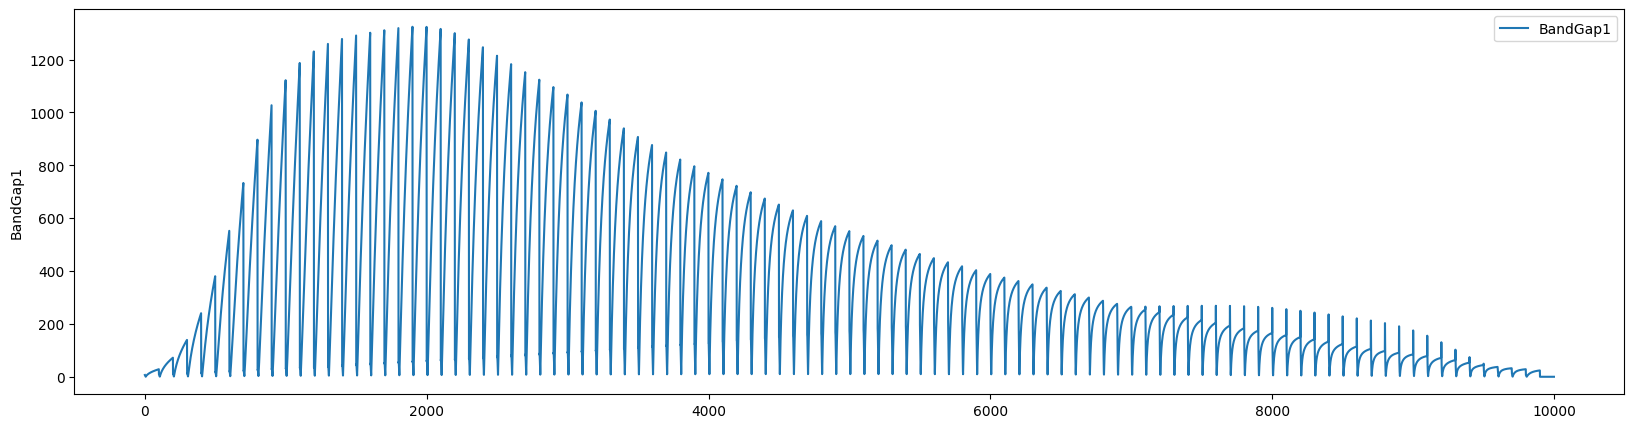

In [5]:
df.plot(y='BandGap1', figsize=(20, 5))
plt.ylabel('BandGap1')
plt.show()

In [6]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

# pythonでは1行目を0行目と数える. x_trainではcsvファイルの1行目から２行目を，y_trainでは3行目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [4]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [4]]

In [8]:
# モデルの構築
# inputの数:c2, s
n_in = 2

# ノードの数
n_hidden = 16

# outputの数:BandGap
n_out = 1

# 学習回数
epochs = 150
batch_size = 64

model = Sequential()
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(units=n_out))
model.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-traina

In [9]:
 # 学習オプション
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/150
125/125 [==============================] - 2s 6ms/step - loss: 202188.0938 - val_loss: 109445.6250
Epoch 2/150
125/125 [==============================] - 1s 6ms/step - loss: 79180.6875 - val_loss: 75485.3125
Epoch 3/150
125/125 [==============================] - 0s 2ms/step - loss: 75729.2188 - val_loss: 73301.7578
Epoch 4/150
125/125 [==============================] - 0s 3ms/step - loss: 73463.7188 - val_loss: 70592.4766
Epoch 5/150
125/125 [==============================] - 0s 2ms/step - loss: 69993.2188 - val_loss: 66843.7891
Epoch 6/150
125/125 [==============================] - 0s 2ms/step - loss: 64592.1836 - val_loss: 59618.5508
Epoch 7/150
125/125 [==============================] - 0s 2ms/step - loss: 54739.0469 - val_loss: 46456.7969
Epoch 8/150
125/125 [==============================] - 0s 2ms/step - loss: 40216.0078 - val_loss: 36014.8516
Epoch 9/150
125/125 [==============================] - 0s 2ms/step - loss: 31340.0332 - val_loss: 28961.7168
Epoch 10/150
125/

In [10]:
test_predict = model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


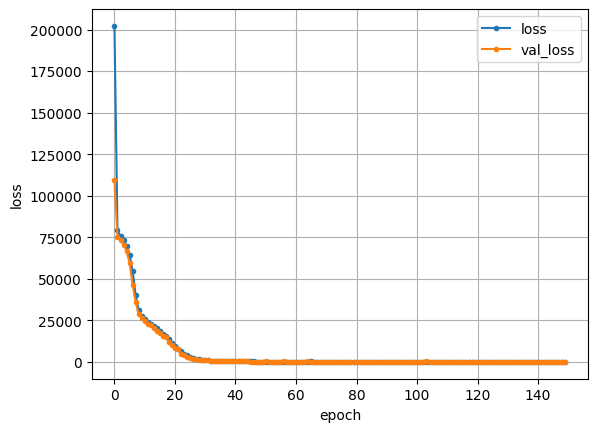

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
# MAE
test_MAE = mean_absolute_error(y_test, test_predict)
print('MAE：', test_MAE)

# MSE
test_MSE = mean_squared_error(y_test, test_predict)
print('MSE：', test_MSE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test, test_predict))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test, test_predict)
print('R2：', R2)

# MAEに対するRMSEの比
print('RMSE/MAE：', test_RMSE / test_MAE)

MAE： 5.327106256107744
MSE： 55.238297235420845
RMSE： 7.432247118834306
R2： 0.9994452844038151
RMSE/MAE： 1.3951753093554184


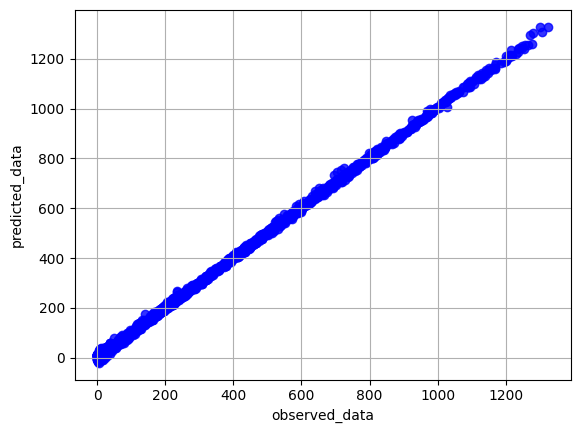

In [13]:
plt.figure()
plt.scatter(y_test, test_predict, c='blue', alpha=0.8)
plt.ylim(plt.ylim())
plt.grid()
plt.xlabel('observed_data')
plt.ylabel('predicted_data')
plt.show()

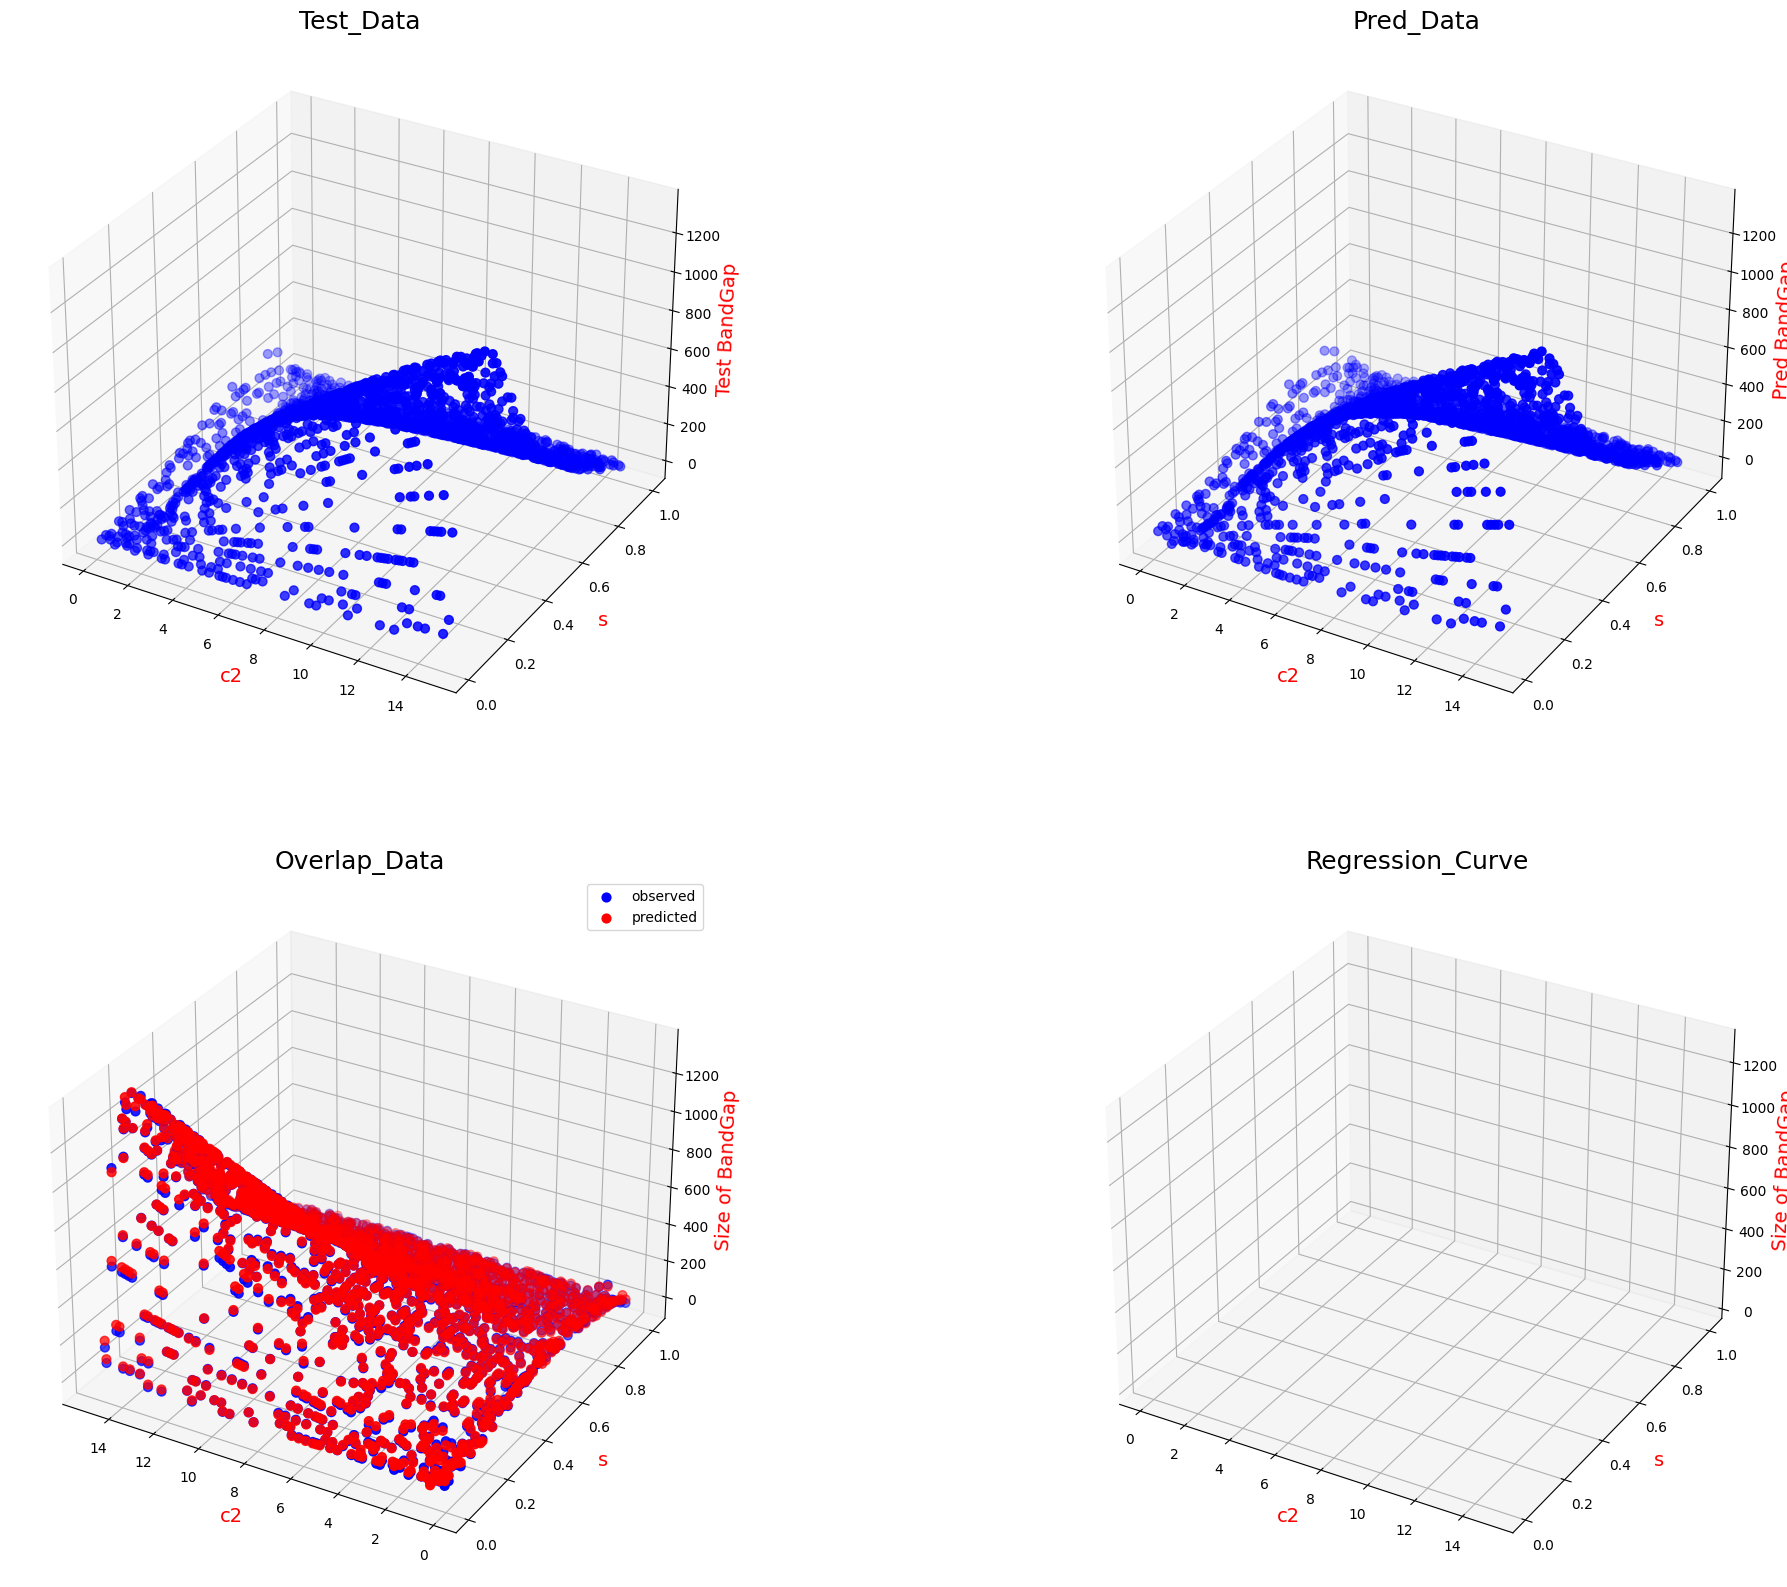

In [14]:
# Figureを追加
fig = plt.figure(figsize = (25, 20))

# 3DAxesを追加
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

# Axesのタイトルを設定
ax1.set_title("Test_Data", size = 18)
ax2.set_title("Pred_Data", size = 18)
ax3.set_title("Overlap_Data", size = 18)
ax4.set_title("Regression_Curve", size = 18)

# 軸ラベルを設定
ax1.set_xlabel("c2", size = 14, color = "r")
ax1.set_ylabel("s", size = 14, color = "r")
ax1.set_zlabel("Test BandGap", size = 14, color = "r")
ax2.set_xlabel("c2", size = 14, color = "r")
ax2.set_ylabel("s", size = 14, color = "r")
ax2.set_zlabel("Pred BandGap", size = 14, color = "r")
ax3.set_xlabel("c2", size = 14, color = "r")
ax3.set_ylabel("s", size = 14, color = "r")
ax3.set_zlabel("Size of BandGap", size = 14, color = "r")
ax4.set_xlabel("c2", size = 14, color = "r")
ax4.set_ylabel("s", size = 14, color = "r")
ax4.set_zlabel("Size of BandGap", size = 14, color = "r")

# x,y,zに要素追加
x = x_test.iloc[:, [0]]
y = x_test.iloc[:, [1]]
z1 = y_test
z2 = test_predict

# 散布図
ax1.scatter(x, y, z1, s = 40, c = "blue")
ax2.scatter(x, y, z2, s = 40, c = "blue")
ax3.scatter(x, y, z1, s = 40, c = "blue")
ax3.scatter(x, y, z2, s = 40, c = "red")
ax4.plot_surface(x, y, z2)

ax3.legend(["observed", "predicted"])
ax3.invert_xaxis()

plt.show()

In [34]:
import tensorflow as tf

# パラメータの初期値を設定
target_bandgap = tf.constant([1000.0], dtype=tf.float32)

# 初期の入力値をランダムに設定（c2は0から15の範囲、sは0から1の範囲に制限）
c2 = tf.Variable(tf.random.uniform([1], 0, 15))
s = tf.Variable(tf.random.uniform([1], 0, 1))

# 最適化手法を定義
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 各値を保存するリスト
c2_values = []
s_values = []
predicted_bandgap_values = []

# 損失関数の値を保存するリスト
loss_values = []

# 学習回数
step = 1000

# 学習を実行
for step in range(step):
    # 勾配計算を行うためのAPI
    with tf.GradientTape() as tape:

        # モデルの出力を定義(予測値を計算)
        predicted_bandgap = model(tf.stack([c2, s], axis=1))
        # 誤差関数を定義（予測値と目標値の平均二乗誤差を計算）
        loss = tf.reduce_mean(tf.square(predicted_bandgap - target_bandgap))

    # 勾配を計算(損失に対する各パラメータc2とsの勾配（偏微分）を計算)
    gradients = tape.gradient(loss, [c2, s])
    # 最適化手法を適用(計算された勾配を使用してパラメータc2とsを更新)
    optimizer.apply_gradients(zip(gradients, [c2, s]))

    # 各値を保存
    c2_values.append(c2.numpy()[0])
    s_values.append(s.numpy()[0])
    predicted_bandgap_values.append(predicted_bandgap.numpy()[0])

    # 損失関数の値を保存
    loss_values.append(loss.numpy())

    # 10ステップごとに結果を出力
    if step % 10 == 0:
        print(f'Epoch: {step}, Loss: {loss.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

# 最終的な学習結果を出力(c2とsのパラメータ)
print(f'Loss: {loss.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

Epoch: 0, Loss: 70346.84375, c2: [8.073217], s: [0.31403726]
Epoch: 10, Loss: 29026.4765625, c2: [8.173159], s: [0.22565825]
Epoch: 20, Loss: 27380.998046875, c2: [8.273484], s: [0.19344182]
Epoch: 30, Loss: 23922.349609375, c2: [8.37275], s: [0.20371662]
Epoch: 40, Loss: 21568.859375, c2: [8.468971], s: [0.2085319]
Epoch: 50, Loss: 19406.05078125, c2: [8.562463], s: [0.21122615]
Epoch: 60, Loss: 17416.845703125, c2: [8.6532755], s: [0.21311477]
Epoch: 70, Loss: 15590.03125, c2: [8.741394], s: [0.21470924]
Epoch: 80, Loss: 13916.1220703125, c2: [8.826792], s: [0.21620055]
Epoch: 90, Loss: 12386.3828125, c2: [8.90944], s: [0.21765462]
Epoch: 100, Loss: 10992.4423828125, c2: [8.989307], s: [0.21909015]
Epoch: 110, Loss: 9726.0, c2: [9.066373], s: [0.22050871]
Epoch: 120, Loss: 8578.9833984375, c2: [9.140616], s: [0.22190633]
Epoch: 130, Loss: 7543.42724609375, c2: [9.212025], s: [0.22327763]
Epoch: 140, Loss: 6611.5537109375, c2: [9.280588], s: [0.22461733]
Epoch: 150, Loss: 5775.8608398

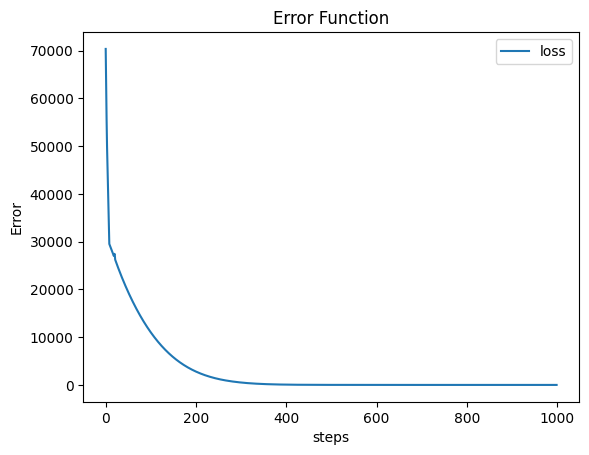

In [35]:
# 誤差関数の値をプロット
plt.plot(loss_values, label='loss')
plt.title('Error Function')
plt.xlabel('steps')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

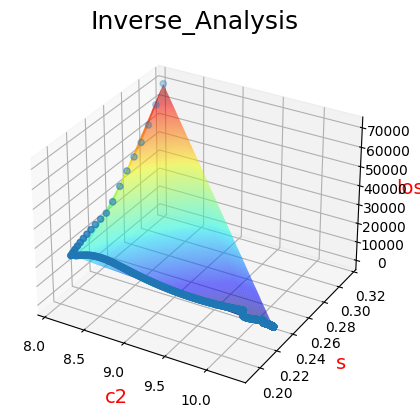

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# x,y,zに要素追加
x = np.array(c2_values)
y = np.array(s_values)
z = np.array(loss_values)  # lossをリスト形式に変換

# 配列の形状を確認
assert x.shape == y.shape == z.shape, "Shape mismatch!"

# scipy.interpolate.griddata() でサンプリングしなおす
x_new, y_new = np.meshgrid(np.linspace(x.min(), x.max(), len(x)), np.linspace(y.min(), y.max(), len(y)))
z_new = griddata((x, y), z, (x_new, y_new), method='linear')

# Figureを追加
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Axesのタイトルを設定
ax.set_title("Inverse_Analysis", size = 18)
# 軸ラベルを設定
ax.set_xlabel("c2", size = 14, color = "r")
ax.set_ylabel("s", size = 14, color = "r")
ax.set_zlabel("loss", size = 14, color = "r")
ax.plot_surface(x_new, y_new, z_new, rstride=1, cstride=10, cmap='jet', alpha=0.7)
ax.scatter(c2_values, s_values, loss_values)
plt.show()